# Sprint3 機械学習スクラッチ線形回帰   

この課題の目的   
- オブジェクト指向を意識した実装に慣れる
- 数式をコードに落とし込めるようにする
- スクラッチを通して線形回帰を理解する
- 基本的な機械学習のキーワードを学習する

## 【問題1】 線形回帰のクラスを作成する

線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。

以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

- とりあえず適当な値で計算してみる

In [2]:
#x：(4, 2)の特徴量、係数1を1列目に挿入して(4, 3)の行列
x = np.array([[1, 2, 3],
                    [1, 4, 5],
                    [1, 6, 7],
                    [1, 8, 9]])

#theta：重み
theta = np.array([5, 6, 7])[np.newaxis, :]
theta.shape

#y：目的変数
y = np.array([[60],
                     [85],
                     [100],
                     [120]])

#学習率
alpha = 0.1

In [3]:
#仮定関数
y_pred = np.dot(x, theta.T)
y_pred

array([[ 38],
       [ 64],
       [ 90],
       [116]])

In [4]:
#MSE
((y_pred - y)**2).sum() / (2 * len(y))

130.125

In [5]:
#error
error = y_pred - y
error

array([[-22],
       [-21],
       [-10],
       [ -4]])

In [6]:
#最急降下法
theta = theta - (alpha / x.shape[0]) * (np.dot(error.T, x))
theta

array([[ 6.425, 11.5  , 13.925]])

### ・仮定関数

以下の数式で表される線形回帰の仮定関数を実装します。
$$ h^{}_{0}(x) = \theta^{}_{0}x^{}_{0} + \theta^{}_{1}x^{}_{1} + ... \theta^{}_{j}x^{}_{j} + ... \theta^{}_{n}x^{}_{n} (x^{}_{0} = 1) $$   
$ x $ : 特徴量ベクトル   
$ \theta $ : パラメータベクトル   
$ n $ : 特徴量の数   
$ x^{}_{j} $  : j番目の特徴量   
$ \theta^{}_{j} $ : j番目のパラメータ（重み）

特徴量の数 $ n $ が任意の値に対応できる実装にする。   
なお、ベクトル形式で表すと以下のようになる。
$$ h^{}_{0}(x) = \theta^{T} \cdot x $$

以下の雛形を参考にScratchLinearRegressionクラスへメソッドを追加してください。Pythonではクラスの外から呼び出すことがないメソッドにはアンダースコアを先頭にひとつつける慣例があります。

In [7]:
#データの抜き出し
df = pd.read_csv('train.csv')
df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]

#説明変数をX, 目的変数をyのndarrayに格納
X = df[['YearBuilt', 'GrLivArea']].values
y = df['SalePrice'].values

X = X.astype('float64')
y = y.astype('float64')

#データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y)

#インスタンス化
sc_X = StandardScaler()
sc_y = StandardScaler()

#学習用データをfit_transform
X_train_std = sc_X.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis])

#検証用データをtransform
X_test_std = sc_X.transform(X_test)
y_test_std = sc_y.transform(y_test[:, np.newaxis])

In [8]:
def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習データ

    Returns
    -------
    y_hat : 次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
    """
    #Xの1列目に1を挿入
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
        
    #重み(seedで固定)
    np.random.seed(0)
    theta = np.random.randn(X.shape[1])[np.newaxis, :]

    #仮定関数による推定結果
    y_hat = np.dot(X, theta.T)
    
    return y_hat

In [9]:
#仮定関数
y_hat = _linear_hypothesis(X_train_std)
y_hat

array([[ 1.35189962],
       [ 0.5224102 ],
       [-0.5461619 ],
       ...,
       [ 2.9100884 ],
       [ 1.32042299],
       [ 0.96723423]])

クラス用に書き換える

In [10]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習データ

    Returns
    -------
    y_hat : 次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
    """        
    y_hat = np.dot(X, self.coef_.T)
        
    return y_hat

### ・目的関数

以下の数式で表される線形回帰の目的関数を実装してください。平均二乗誤差（mean square error : MSE）です。ただし、最急降下法をやりやすくするために2で割っています。

$$ J(\theta) = \frac{1}{2m} \sum_{i = 1}^{m} (h^{}_{0}(x^{(i)}) - y^{(i)})^2 $$


$ m $ : 入力されるデータの数   
$ h^{}_{\theta}() $ : 仮定関数   
$ x^{(i)} $ : i番目のサンプルの特徴量ベクトル   
$ y^{(i)} $ : i番目のサンプルの正解値

In [11]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算(2で割っている)

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples, 1)
        推定した値
    y : 次の形のndarray, shape (n_samples, 1)
        正解値

    Returns
    ----------
    numpy.float
        平均二乗誤差の1/2
    """
    return (1/ len(y)) * ((y_pred - y)**2).sum()

In [12]:
#MSE
MSE(y_hat, y_train_std)

3.636001121001359

クラスにも同様のものを挿入

### ・最急降下法

最急降下法により学習させます。j番目のパラメータの更新式は以下のようになります。

$$ \theta^{}_{j} := \theta{}_{j} - \alpha \frac{1}{2m} \sum_{i = 1}^{m}[(h^{}_{0}(x^{(i)}) - y^{(i)})x^{(i)}_{j}] $$

$ \alpha $ : 学習率   
$ i $ : サンプルのインデックス   
$ j $ : 特徴量のインデックス   

ScratchLinearRegressionクラスへメソッドを追加してください。これまでの雛形を参考にコメントアウト部分の説明も記述してください。

雛形を用意したメソッドや関数以外でも必要があれば各自作成して、スクラッチによる実装を完成させてください。必要があれば雛形を外れても問題ありません。

In [13]:
#errorを求める
error = y_hat - y_train_std
error

array([[1.5307624 ],
       [1.34504219],
       [0.60769869],
       ...,
       [1.1291476 ],
       [1.71838641],
       [2.15138226]])

In [14]:
def _gradient_descent(X, error):
    '''
    最急降下法の計算
    
    Parameters
    ----------------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
      
    Retruns
    ----------
    theta : 次の形のndarray, shape (n_samples, 1)
        パラメータ
    '''
    #Xの1列目に1を挿入
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    
    #重み(seedで固定)
    np.random.seed(0)
    theta = np.random.randn(X.shape[1])
    
    #学習率
    alpha = 0.1
    
    #最急降下法
    theta = theta - (alpha / X.shape[0]) * (np.dot(error.T, X))
    return theta

In [15]:
#最急降下法
new_theta = _gradient_descent(X_train_std, error)
new_theta

array([[1.58764711, 0.39423099, 0.94070112]])

クラス用に書き換える

In [16]:
def _gradient_descent(self, X, error):
    """
    最急降下法の計算

    Parameters
    ----------------
        
    X : 次の形のndarray, shape (n_samples, n_features)
        学習データ
    error : 次の形のndarray, shape (n_samples, 1)
        推定した値と正解値の差
    
    Retruns
    ----------
    self.coef_ : 次の形のndarray, shape (n_samples, 1)
        パラメータ
    """
    self.coef_ = self.coef_ - self.lr * (self.lr / X.shape[0]) * (np.dot(error.T, X))
    return self.coef_

### ・クラスの作成

In [17]:
class ScratchLinearRegression():
    '''
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    bias : bool
      バイアス項を入れない場合はFalse
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録
    self.coef_ : 次の形のndarray, shape (n_features, 1)
      パラメータ      
    '''
    def __init__(self, num_iter=500, lr=0.002, bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter        = num_iter  #イテレーション数
        self.lr           = lr             #学習率
        self.bias       = bias         #バイアス項(True : あり, False : なし)
        self.verbose = verbose   #学習過程(True : 出力する, False : 出力しない)
        
        # 損失を記録する配列を用意
        self.loss        = np.zeros(self.iter) #学習用データを記録する0配列
        self.val_loss  = np.zeros(self.iter) #検証用データを記録する0配列
        
        #パラメータを用意
        np.random.seed(41)
        self.coef_ = 0

        
    def fit(self, X, y, X_val=None, y_val=None):
        '''
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値     
        '''
        #1次元なら2次元にする
        if X.ndim == 1:
            X = X[:, np.newaxis]
        if y.ndim == 1:
            y = y[:, np.newaxis]
            
        #検証用データあり
        if X_val is not None and y_val is not None:
            if X_val.ndim == 1:
                X_val = X_val[:, np.newaxis]
            if y_val.ndim == 1:
                y_val = y_val[:, np.newaxis]            

        
        #バイアス項あり
        if self.bias == True:
            #1列目に1の配列を挿入
            X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
            
            #検証用データあり
            if X_val is not None and y_val is not None:
                #1列目に1の配列を挿入
                X_val = np.insert(X_val, 0, np.ones(X_val.shape[0]), axis=1)
            
        #パラメータを設定
        self.coef_ = np.random.randn(X.shape[1])[np.newaxis, :]  
        
        '''
        ここから学習
        '''
        for i in range(self.iter):
            #仮定関数より推定
            y_hat = self._linear_hypothesis(X)

            #errorの計算
            error = y_hat - y

            #損失の記録を格納
            mse = MSE(y_hat, y)
            self.loss[i] += mse

            #パラメータの更新
            self.coef_ = self._gradient_descent(X, error)
                    
            #検証用データあり
            if X_val is not None and y_val is not None:
                        
                #推定
                y_val_hat = self._linear_hypothesis(X_val)
                        
                #損失の記録を格納
                mse_val = MSE(y_val_hat, y_val)
                self.val_loss[i] += mse_val

            #学習過程を出力する場合
            if self.verbose == True:
                print('学習用データの学習過程' + str(i + 1) + '番目 : ' + str(self.loss[i]))

                #検証用データあり
                if X_val is not None or y_val is not None:
                    print('検証用データの学習過程' + str(i + 1) + '番目 : ' + str(self.val_loss[i]))


    def predict(self, X):
        '''
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量

        Returns
        -------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        '''
        if self.bias == True:
            #Xの1列目に1を挿入
            X = np.insert(X, 0, np.ones(X.shape[0]), axis=1) 

        #推定
        y_pred = np.dot(X, self.coef_.T)

        return y_pred
                

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習データ

        Returns
        -------
        y_hat : 次の形のndarray, shape (n_samples, 1)
            線形の仮定関数による推定結果
        """        
        y_hat = np.dot(X, self.coef_.T)
        
        return y_hat
                
        
    def MSE(y_pred, y):
        """
        平均二乗誤差の計算(2で割っている)

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples, 1)
            推定した値
        y : 次の形のndarray, shape (n_samples, 1)
            正解値

        Returns
        ----------
        numpy.float
            平均二乗誤差の1/2
        """
        return (1/ len(y)) * ((y_pred - y)**2).sum()
    

    def _gradient_descent(self, X, error):
        """
        最急降下法の計算

        Parameters
        ----------------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        error : 次の形のndarray, shape (n_samples, 1)
            推定した値と正解値の差

        Retruns
        ----------
        self.coef_ : 次の形のndarray, shape (n_samples, 1)
            パラメータ
        """
        self.coef_ = self.coef_ - (self.lr / X.shape[0]) * (np.dot(error.T, X))
        return self.coef_

In [19]:
#学習(バイアス項あり、学習過程を出力)
slinear = ScratchLinearRegression(verbose=True)
slinear.fit(X_train_std, y_train_std, X_test_std, y_test_std)

学習用データの学習過程1番目 : 0.7081866597559773
検証用データの学習過程1番目 : 0.8052283962127569
学習用データの学習過程2番目 : 0.7066778698256814
検証用データの学習過程2番目 : 0.8033145331111204
学習用データの学習過程3番目 : 0.7051760346788535
検証用データの学習過程3番目 : 0.8014087508999225
学習用データの学習過程4番目 : 0.7036811221166583
検証用データの学習過程4番目 : 0.7995110139049467
学習用データの学習過程5番目 : 0.70219310008991
検証用データの学習過程5番目 : 0.7976212866136543
学習用データの学習過程6番目 : 0.7007119366983752
検証用データの学習過程6番目 : 0.7957395336744391
学習用データの学習過程7番目 : 0.6992376001900777
検証用データの学習過程7番目 : 0.7938657198958871
学習用データの学習過程8番目 : 0.6977700589606076
検証用データの学習過程8番目 : 0.7919998102460399
学習用データの学習過程9番目 : 0.6963092815524328
検証用データの学習過程9番目 : 0.790141769851661
学習用データの学習過程10番目 : 0.694855236654214
検証用データの学習過程10番目 : 0.7882915639975041
学習用データの学習過程11番目 : 0.6934078931001234
検証用データの学習過程11番目 : 0.7864491581255887
学習用データの学習過程12番目 : 0.6919672198691659
検証用データの学習過程12番目 : 0.7846145178344736
学習用データの学習過程13番目 : 0.6905331860845036
検証用データの学習過程13番目 : 0.7827876088785394
学習用データの学習過程14番目 : 0.6891057610127838
検証用データの学習過程14番目 : 0.780

## 【問題2】 学習曲線のプロット

まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

学習曲線をプロットし、スクラッチ実装が正しく動いているかを検証しましょう。

In [20]:
def model_loss(loss, val_loss, title='model loss'):
    '''
    学習曲線を作成する関数
    
    Parameters
    ----------------
    loss : 次の形のndarray, shape (self.iter,)
        学習用データに対する損失の記録
    val_loss : 次の形のndarray, shape (self.iter,)
        検証用データに対する損失の記録
    title : str
        タイトルの名前 
    '''
    plt.title(title)
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.plot(range(len(loss)), loss, color='red', label='loss')
    plt.plot(range(len(val_loss)), val_loss, color='blue', label='val_loss')
    plt.legend()
    plt.show()

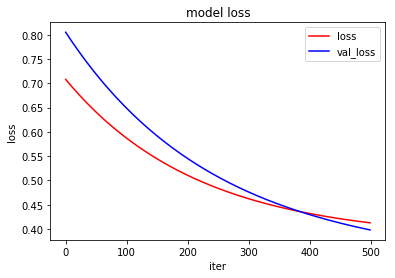

In [21]:
#学習曲線
model_loss(slinear.loss, slinear.val_loss)

In [22]:
#予測
y_train_pred = slinear.predict(X_train_std)
y_test_pred = slinear.predict(X_test_std)

In [23]:
def residual_plots(y_train, y_train_pred, y_test, y_test_pred, title='Residual Plots'):
    '''
    残差プロットを作成し、MSEとR2を出力する関数
    
    Parameters
    ----------------
    y_train : 次の形のndarray, shape (n_samples, )
        学習用データの正解値
    y_train_pred : 次の形のndarray, shape (n_samples, )
        学習用データの予測値
    y_test : 次の形のndarray, shape (n_samples, )
        検証用データの正解値
    y_train_pred : 次の形のndarray, shape (n_samples, )
        検証用データの予測値    
    title : str
        タイトルの名前 
    '''
    #1次元のとき2次元にする
    if y_train.ndim == 1:
        y_train = y_train[:, np.newaxis]    
    if y_train_pred.ndim == 1:
        y_train_pred = y_train_pred[:, np.newaxis]
    if y_test.ndim == 1:
        y_test = y_test[:, np.newaxis]    
    if y_test_pred.ndim == 1:
        y_test_pred = y_test_pred[:, np.newaxis]  
        
    p1 = plt.scatter(y_train_pred, y_train_pred - y_train)
    p2 = plt.scatter(y_test_pred, y_test_pred - y_test)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend([p1, p2], ['train_data', 'test_data'])
    plt.hlines(y=0, xmin=-10, xmax=50)
    plt.xlim([-3, 4])
    plt.tight_layout()
    plt.title(title)
    plt.show()

    print('train_data MSE :{:.3f}, R2 :{:.3f}'.format(mean_squared_error(y_train, y_train_pred), r2_score(y_train, y_train_pred)))
    print('test_data MSE :{:.3f}, R2 :{:.3f}'.format(mean_squared_error(y_test, y_test_pred), r2_score(y_test, y_test_pred)))

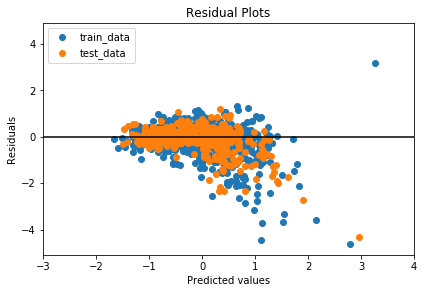

train_data MSE :0.413, R2 :0.587
test_data MSE :0.398, R2 :0.665


In [24]:
#残差プロット
residual_plots(y_train_std, y_train_pred, y_test_std, y_test_pred)

In [25]:
def scatter(X_train, y_train, X_test, y_test, xlabel='xlabel', ylabel='SalePrice', title='title'):
    '''
    ある特徴量と目的変数の可視化を行うための関数

    Parameters
    ---------------
    X_train : ndarray, shape(n_samples, 1)
        学習用データ
    y_train : ndarray, shape(n_samples, 1)
        学習用データ
    X_test : ndarray, shape(n_samples, 1)
        検証用データ
    y_test : ndarray, shape(n_samples, 1)
        検証用データ
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    '''    
    # 散布図作成
    p1 = plt.scatter(X_train, y_train, color='red',  edgecolors="red", alpha=0.3, linewidths="2")
    p2 = plt.scatter(X_test, y_test, color='blue', edgecolors="blue", alpha=0.3, linewidths="2")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend([p1, p2], ['train_data', 'test_data'])
    plt.show()

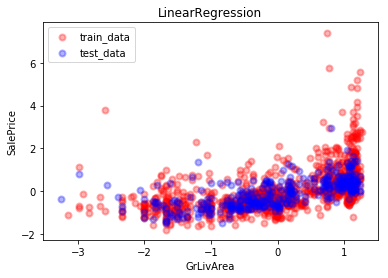

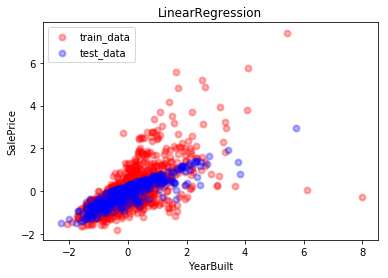

In [26]:
#特徴量ごとの目的変数との散布図
scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_test_pred, xlabel='GrLivArea', title='LinearRegression')
scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_test_pred, xlabel='YearBuilt', title='LinearRegression')

scikit-learnのLinearRegeressionを使用し、比較する。

In [27]:
#sklearnのLinearRegressionで予測
linear = LinearRegression()
linear.fit(X_train_std, y_train_std)
y_train_pred_linear = linear.predict(X_train_std)
y_test_pred_linear = linear.predict(X_test_std)

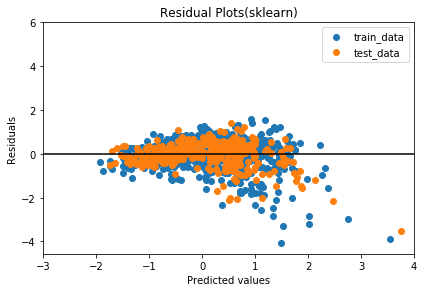

train_data MSE :0.379, R2 :0.621
test_data MSE :0.318, R2 :0.732


In [28]:
#残差プロット
residual_plots(y_train_std, y_train_pred_linear, y_test_std, y_test_pred_linear, title=('Residual Plots(sklearn)'))

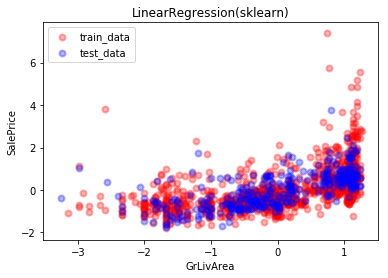

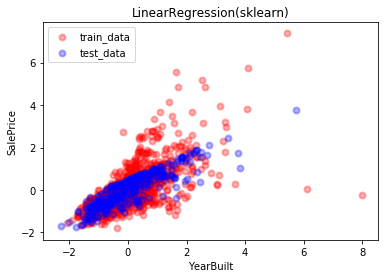

In [29]:
#散布図
scatter(X_train_std[:, 0], y_train_std, X_test_std[:, 0], y_test_pred_linear, xlabel='GrLivArea', title='LinearRegression(sklearn)')
scatter(X_train_std[:, 1], y_train_std, X_test_std[:, 1], y_test_pred_linear, xlabel='YearBuilt', title='LinearRegression(sklearn)')

スクラッチしたクラスとsklearnにあるLinearRegressionを比較すると、若干の誤差はあったが、ほぼ似たような精度、分布になっていた。

## 【問題3】 バイアス項の除去

バイアス項 $ \theta^{}_{0} $ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [30]:
#学習(バイアス項なし、学習曲線は出力)
nobias_slinear = ScratchLinearRegression(verbose=True, bias=False)
nobias_slinear.fit(X_train_std, y_train_std, X_test_std, y_test_std)

学習用データの学習過程1番目 : 1.2178179326820906
検証用データの学習過程1番目 : 1.3467800710136684
学習用データの学習過程2番目 : 1.2138501226581222
検証用データの学習過程2番目 : 1.3423021594588112
学習用データの学習過程3番目 : 1.2099011218053735
検証用データの学習過程3番目 : 1.3378445165101056
学習用データの学習過程4番目 : 1.2059708408467498
検証用データの学習過程4番目 : 1.333407048226867
学習用データの学習過程5番目 : 1.2020591909292755
検証用データの学習過程5番目 : 1.328989661109627
学習用データの学習過程6番目 : 1.198166083622076
検証用データの学習過程6番目 : 1.324592262098047
学習用データの学習過程7番目 : 1.1942914309143746
検証用データの学習過程7番目 : 1.3202147585688404
学習用データの学習過程8番目 : 1.190435145213492
検証用データの学習過程8番目 : 1.3158570583337055
学習用データの学習過程9番目 : 1.1865971393428625
検証用データの学習過程9番目 : 1.311519069637269
学習用データの学習過程10番目 : 1.1827773265400527
検証用データの学習過程10番目 : 1.3072007011550373
学習用データの学習過程11番目 : 1.178975620454795
検証用データの学習過程11番目 : 1.3029018619913593
学習用データの学習過程12番目 : 1.1751919351470286
検証用データの学習過程12番目 : 1.2986224616773974
学習用データの学習過程13番目 : 1.171426185084948
検証用データの学習過程13番目 : 1.2943624101691098
学習用データの学習過程14番目 : 1.1676782851430643
検証用データの学習過程14番目 : 1.2901216

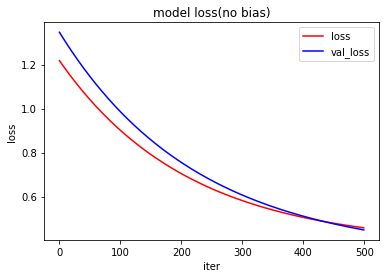

In [44]:
#学習曲線
model_loss(nobias_slinear.loss, nobias_slinear.val_loss, title='model loss(no bias)')

In [32]:
#予測
nobias_y_train_pred = nobias_slinear.predict(X_train_std)
nobias_y_test_pred = nobias_slinear.predict(X_test_std)

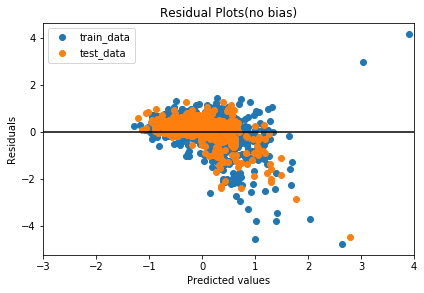

train_data MSE :0.458, R2 :0.542
test_data MSE :0.449, R2 :0.622


In [33]:
residual_plots(y_train_std, nobias_y_train_pred, y_test_std, nobias_y_test_pred, title='Residual Plots(no bias)')

バイアス項がある場合とない場合で学習曲線を比較すると、学習曲線は似ていたが、最初のloss(誤差)がバイアス項なしのほうが大きかった。また、MSEとR2を見ると、MSEは学習用データと検証用データともにバイアス項除去前のほうが低く、R2はバイアス項除去前のほうが高かった。   
ある特徴量をx軸、目的変数をy軸の２次元で考えると、バイアス項は切片にあたる。つまり、これがないと回帰直線は原点を通る直線になるため、上手く誤差を最小にできない。今回のバイアス項の有無によるこの誤差は、こういった理由からの誤差と思われる。

## 【問題4】 特徴量の多次元化

特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

### ・特徴量を2乗する

In [34]:
#特徴量を２乗
X2_train = X_train**2
X2_test = X_test**2

#インスタンス化
sc_X2 = StandardScaler()

#学習用データをfit_transform
X2_train_std = sc_X2.fit_transform(X2_train)

#検証用データをtransform
X2_test_std = sc_X2.transform(X2_test)

In [35]:
#学習(バイアス項あり)
slinear2 = ScratchLinearRegression(verbose=False)
slinear2.fit(X2_train_std, y_train_std, X2_test_std, y_test_std)

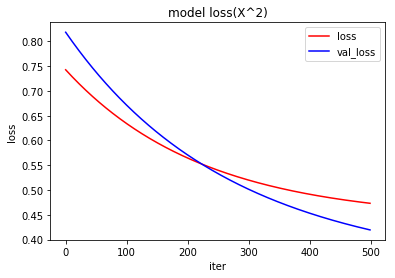

In [36]:
#学習曲線
model_loss(slinear2.loss, slinear2.val_loss, title='model loss(X^2)')

In [37]:
#予測
y2_train_pred = slinear2.predict(X2_train_std)
y2_test_pred = slinear2.predict(X2_test_std)

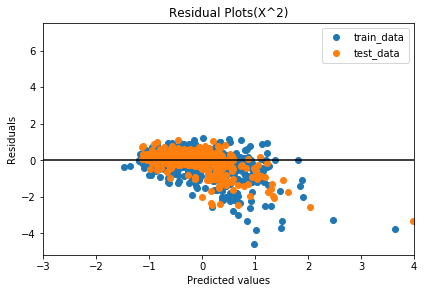

train_data MSE :0.473, R2 :0.527
test_data MSE :0.419, R2 :0.647


In [38]:
residual_plots(y_train_std, y2_train_pred, y_test_std, y2_test_pred, title='Residual Plots(X^2)')

### ・特徴量を3乗する

In [39]:
#特徴量を3乗
X3_train = X_train**3
X3_test = X_test**3

#インスタンス化
sc_X3 = StandardScaler()

#学習用データをfit_transform
X3_train_std = sc_X3.fit_transform(X3_train)

#検証用データをtransform
X3_test_std = sc_X3.transform(X3_test)

In [40]:
#学習(バイアス項あり)
slinear3 = ScratchLinearRegression(verbose=False)
slinear3.fit(X3_train_std, y_train_std, X3_test_std, y_test_std)

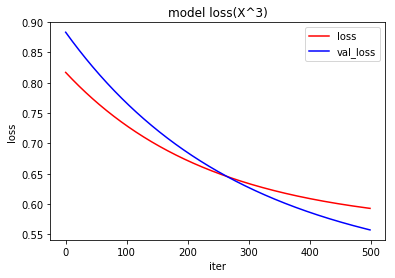

In [41]:
#学習曲線
model_loss(slinear3.loss, slinear3.val_loss, title='model loss(X^3)')

In [42]:
#予測
y3_train_pred = slinear3.predict(X3_train_std)
y3_test_pred = slinear3.predict(X3_test_std)

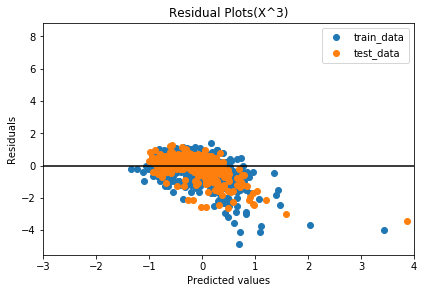

train_data MSE :0.593, R2 :0.407
test_data MSE :0.557, R2 :0.531


In [43]:
residual_plots(y_train_std, y3_train_pred, y_test_std, y3_test_pred, title='Residual Plots(X^3)')

特徴量を2乗、3乗と増やしていくにつれ、学習データ、検証データともにMSEは上がり、R2は下がっていった。2乗、3乗と特徴量を大きくしたことで、本来の特徴量と目的変数の関係性が変化し(例えば、もともと比例関係にあれば、特徴量を2乗することで比例関係は崩れる)、その分精度が下がったと思われる。

## 【問題5】 更新式の導出

最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
$$ \theta^{}_{j} := \theta{}_{j} - \alpha \frac{1}{m} \sum_{i = 1}^{m}[(h^{}_{0}(x^{(i)}) - y^{(i)})x^{(i)}_{j}] $$

以下の式から説明をはじめることができます。
$$ \theta^{}_{j} := \theta^{}_{j} - \frac{\partial}{\partial \theta^{}_{j}} J(\theta) $$

$ \theta $を更新していき、目的関数を0に近づける。このとき、学習率$\alpha$(0~1の正の値)を$\frac{\partial}{\partial \theta{}_{j}} J(\theta)$にかけ合わせることで、更新させる大きさを決める。

$ u = J(\theta), v = h^{}_{0}(x^{(i)}) $のとき、

$
\begin{align*}
\frac{\partial u}{\partial \theta^{}_{j}} = \frac{\partial u}{\partial v} \cdot \frac{\partial v}{\partial \theta^{}_{j}}
\end{align*}
$   
<br>
<br>
$ u $ を $ v $ で微分すると、

$
\begin{align*}
\frac{\partial u}{\partial v} &= \frac{\partial}{\partial v} (\frac{1}{2m} \sum_{i = 1}^{m} (v - y^{(i)})^2)\\
&= \frac{1}{2m} \sum_{i = 1}^{m}( \frac{\partial}{\partial v} (v - y^{(i)})^2)\\
&= \frac{1}{m} \sum_{i = 1}^{m}(v - y^{(i)})
\end{align*}
$   
<br>
<br>
$ v $ を $ \theta^{}_{j} $ で微分すると

$ \begin{align*}
\frac{\partial v}{\partial \theta^{}_{j}} &= \frac{\partial}{\partial \theta^{}_{j}} (\theta^{T}_{} x)\\
\frac{\partial v}{\partial \theta^{}_{j}} &= \frac{\partial}{\partial \theta^{}_{j}} (\theta^{}_{0} x^{}_{0} + \theta^{}_{1} x^{}_{1} + ... + \theta^{}_{m} x^{}_{m})\\
&= x^{}_{j}
\end{align*}
$   
<br>
<br>
これらをかけ合わせると、

$ \begin{align*}
\frac{\partial u}{\partial \theta^{}_{j}} &= \frac{1}{m} \sum_{i = 1}^{m}(v - y^{(i)}) \cdot x^{(i)}_{j}\\
&= \frac{1}{m} \sum_{i = 1}^{m}[(h^{}_{0}(x^{(i)}) - y^{(i)}) x^{(i)}_{j}]
\end{align*}
$   
<br>
<br>
これに学習率 $ \alpha $ をかけ合わせると、最急降下法の更新式は、

$
\begin{align*}
\theta^{}_{j} := \theta^{}_{j} - \alpha \frac{1}{m} \sum_{i = 1}^{m}[(h^{}_{0}(x^{(i)}) - y^{(i)})x^{(i)}_{j}]
\end{align*}
$   

となる。

## 【問題6】 局所最適解の問題

最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

$
\begin{eqnarray*}
\theta^{}_{j} := \theta^{}_{j} - \alpha \frac{1}{m} \sum_{i = 1}^{m}[(h^{}_{0}(x^{(i)}) - y^{(i)})x^{(i)}_{j}]
\end{eqnarray*}
$   
以上の式では、j個すべての学習データ(特徴量)の誤差を使って$ \theta $を更新している。言い変えると、すべての学習データで誤差を最小にしようと勾配降下を行うため、大域的最適解を求めることができる。